# Virtual Pruning

## Importing the digitized structure

In [1]:
import numpy as np

from importlib import reload

import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()

In [2]:
from matplotlib.pyplot import *
import mtgplot as mp

## Pruning procedure

To select a pruning point, we start from terminal points, trace back into the structure up to 3 layers. We check if the pruning point is valid by looking the depth of what it carries. If it is in average close to what is intended we select it. Else we select another one.

Point d'amélioration : tailler en fait au milieu de la n4.

In [3]:
import pruning ; reload(pruning)
from pruning import *

## Estimation of gap fraction 

In [4]:
import gapfraction; reload(gapfraction)
from gapfraction import *

D:\V_mango\virtualpruning\notebooks\povray
D:\MesProgrammes\POV-Ray\v3.7\bin\pvengine.exe /EXIT /RENDER gapfraction_view.pov -Ogapfraction_view.png +H400 +W400 +FN -GA -A
Done in 4.332842588424683 sec.


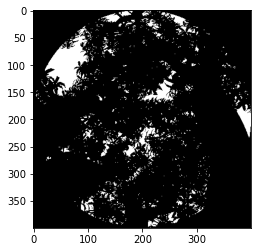

In [5]:
img = generate(g, camheight = 120, debug=True)
imshow(img)

In [6]:
gf = gap_fraction(g, camheight = 120)
print(gf)

0.10616983354021452


In [12]:
import pruning ; reload(pruning)
from pruning import *

t3 = prune(g, 195)

intensity = continuous_intensity_from_pruned(t3)
print(intensity, intensity_level(intensity))

0.595451228883049 T3


D:\V_mango\virtualpruning\notebooks\povray
D:\MesProgrammes\POV-Ray\v3.7\bin\pvengine.exe /EXIT /RENDER gapfraction_view.pov -Ogapfraction_view.png +H400 +W400 +FN -GA -A
Done in 2.650118589401245 sec.


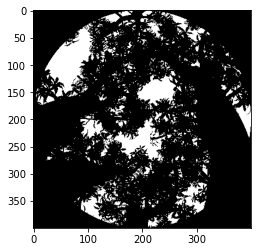

In [13]:
img = generate(t3, size = 400, camheight = 120, debug=True)
imshow(img)

In [14]:
print(gap_fraction(t3, size = 400, camheight = 120, debug=False))

0.20092937394570165


In [15]:
def info(mtg):
    return (continuous_intensity_from_pruned(mtg), gap_fraction(mtg))
nbcuts = list(range(1,201, 2))
gfs = [info(prune(g,nc)) for nc in nbcuts]

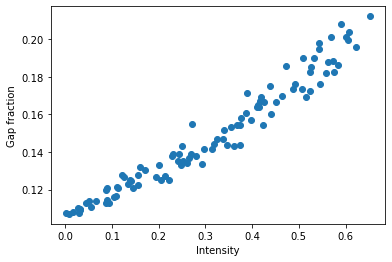

In [16]:
#ylim(0,1)
scatter([a[0] for a in gfs],[a[1] for a in gfs])
xlabel('Intensity')
ylabel('Gap fraction')
show()

In [17]:
import csv
import pandas as pd 

df = pd.DataFrame(gfs) 

df.to_csv('regression_GAP_T.csv') 

In [21]:
df = ([a*3 for a in nbcuts],[a[0] for a in gfs])

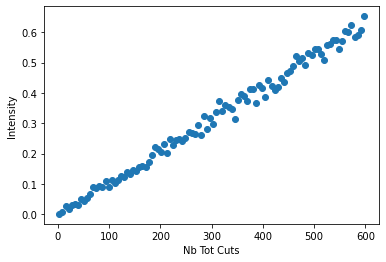

In [22]:
scatter([a*3 for a in nbcuts],[a[0] for a in gfs])
xlabel('Nb Tot Cuts')
ylabel('Intensity')
show()

([3,
  9,
  15,
  21,
  27,
  33,
  39,
  45,
  51,
  57,
  63,
  69,
  75,
  81,
  87,
  93,
  99,
  105,
  111,
  117,
  123,
  129,
  135,
  141,
  147,
  153,
  159,
  165,
  171,
  177,
  183,
  189,
  195,
  201,
  207,
  213,
  219,
  225,
  231,
  237,
  243,
  249,
  255,
  261,
  267,
  273,
  279,
  285,
  291,
  297,
  303,
  309,
  315,
  321,
  327,
  333,
  339,
  345,
  351,
  357,
  363,
  369,
  375,
  381,
  387,
  393,
  399,
  405,
  411,
  417,
  423,
  429,
  435,
  441,
  447,
  453,
  459,
  465,
  471,
  477,
  483,
  489,
  495,
  501,
  507,
  513,
  519,
  525,
  531,
  537,
  543,
  549,
  555,
  561,
  567,
  573,
  579,
  585,
  591,
  597],
 [0.000994674067733649,
  0.010765371630081197,
  0.018984807494428237,
  0.02129705599875906,
  0.022836478195454448,
  0.03971005167637438,
  0.050565567226769755,
  0.060335624950234555,
  0.05613082088413686,
  0.06042069159160459,
  0.0687425752697645,
  0.06720623159424324,
  0.07458764305679805,
  0.0907250784

In [24]:
import csv
import pandas as pd 

df = pd.DataFrame(df) 

df.to_csv('regression_T_nbcut.csv') 